In [18]:
import os
import shutil
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report


In [20]:
import os
import shutil

base_path = "/content/PlantVillage-Dataset/raw/color"
dataset_path = "/content/dataset"

os.makedirs(f"{dataset_path}/Healthy", exist_ok=True)
os.makedirs(f"{dataset_path}/Diseased", exist_ok=True)

MAX_IMAGES = 300

for folder in os.listdir(base_path):
    folder_path = os.path.join(base_path, folder)
    if not os.path.isdir(folder_path):
        continue
    if "healthy" in folder.lower():
        target = f"{dataset_path}/Healthy"
    else:
        target = f"{dataset_path}/Diseased"

    count = 0
    for img_file in os.listdir(folder_path):
        if count >= MAX_IMAGES:
            break
        img_path = os.path.join(folder_path, img_file)
        if os.path.isfile(img_path):
            shutil.copy(img_path, target)
            count += 1

print("Clean dataset created!")


Clean dataset created!


In [21]:
!ls /content/dataset

Diseased  Healthy


In [22]:
import os

dataset_path = "/content/dataset"
for folder in os.listdir(dataset_path):
    folder_path = os.path.join(dataset_path, folder)
    if os.path.isdir(folder_path):
        print(f"Class '{folder}' has {len(os.listdir(folder_path))} images")


Class 'Healthy' has 3452 images
Class 'Diseased' has 7775 images


In [23]:
IMG_SIZE = 128
def preprocess_image(path):
    img = cv2.imread(path)
    if img is None:
        raise FileNotFoundError(f"Image not found: {path}")
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img / 255.0

In [24]:
X = []
y = []

labels = {"Healthy": 0, "Diseased": 1}

for label_name, label_num in labels.items():
    folder_path = os.path.join(dataset_path, label_name)
    count = 0
    for img_file in os.listdir(folder_path):
        if count >= MAX_IMAGES:
            break
        img_path = os.path.join(folder_path, img_file)
        if os.path.isfile(img_path):
            try:
                img_data = preprocess_image(img_path)
                X.append(img_data.flatten())
                y.append(label_num)
                count += 1
            except:
                pass

X = np.array(X)
y = np.array(y)
print("Dataset loaded. Total samples:", len(X))

Dataset loaded. Total samples: 600


In [25]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [27]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
print("k-NN Accuracy:", round(accuracy_score(y_test, knn_pred), 3))

k-NN Accuracy: 0.792


In [26]:
svm = SVC(kernel="linear")
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
print("SVM Accuracy:", round(accuracy_score(y_test, svm_pred), 3))


SVM Accuracy: 0.8


In [28]:
dt = DecisionTreeClassifier(max_depth=10)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
print("Decision Tree Accuracy:", round(accuracy_score(y_test, dt_pred), 3))


Decision Tree Accuracy: 0.692


In [29]:

# Step 9: Predict new leaf image
from google.colab import files

print("Upload a leaf image to predict:")
uploaded = files.upload()  # choose your image

image_path = list(uploaded.keys())[0]

def predict_leaf(image_path):
    img = preprocess_image(image_path)
    features = img.flatten().reshape(1, -1)

    # Using SVM for prediction
    prediction = svm.predict(features)[0]
    label = "Healthy" if prediction == 0 else "Diseased"

    plt.imshow(img)
    plt.axis("off")
    plt.title(f"SVM Prediction: {label}")
    plt.show()

predict_leaf(image_path)


Upload a leaf image to predict:


KeyboardInterrupt: 

Decision Tree Accuracy: 0.6416666666666667


Upload a leaf image to predict:


Saving images.jpg to images.jpg
Uploaded image: images.jpg


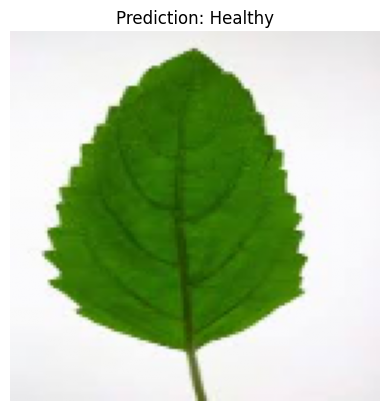